<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/IQ_Mixing_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A tutorial on IQ mixing.

IQ mixing is a technique used in radio frequency (RF) systems to process signals by separating them into two components: an **In-phase (I)** component and a **Quadrature (Q)** component, which is 90° out of phase with the first. This method allows for more efficient and sophisticated handling of signal information, especially for rejecting unwanted frequencies and implementing advanced modulation schemes.

---

## The Basics: What's a Mixer? 📻

Before diving into IQ mixing, you need to understand what a basic mixer does. In RF, a mixer isn't for blending audio; it's a **frequency translator** Think of it as a device that multiplies two signals together.

An ideal mixer has two inputs and one output:
* **RF Input:** The main signal you want to process, at frequency $f_{RF}$.
* **LO Input:** A reference signal from a **L**ocal **O**scillator at frequency $f_{LO}$.
* **IF Output:** The **I**ntermediate **F**requency output, which contains new signals at the **sum and difference** of the input frequencies: $f_{RF} + f_{LO}$ and $f_{RF} - f_{LO}$.


This process is called **down-conversion** if you use the difference frequency to lower the signal's frequency (common in receivers) or **upconversion** if you use the sum frequency to raise it (common in transmitters).

---

## The Math Behind It (It's Just Trig!) 📐

The magic of a mixer comes from a simple trigonometric identity. When you multiply two sine waves, you get:

$$\sin(\omega_{RF}t) \cdot \sin(\omega_{LO}t) = \frac{1}{2}[\cos((\omega_{RF}-\omega_{LO})t) - \cos((\omega_{RF}+\omega_{LO})t)]$$

As you can see, multiplying the two original frequencies ($f_{RF}$ and $f_{LO}$) mathematically produces two new frequencies: the difference ($f_{RF}-f_{LO}$) and the sum ($f_{RF}+f_{LO}$). You then use a filter to pick the one you want.

The output spectrum for mixing an 11 MHz RF signal with a 10 MHz LO signal clearly shows these two new products at 1 MHz (difference) and 21 MHz (sum).


---

## A Big Problem: The Image Frequency 🖼️

Here's where simple mixers run into trouble. Imagine you have a receiver:
* Your desired **RF signal** is at $f_{RF}$ = 11 MHz.
* Your **local oscillator** is at $f_{LO}$ = 10 MHz.
* You want to downconvert to an **IF** of $f_{IF} = 11 - 10 = 1$ MHz.

Great. But what if there's another, unwanted signal at **9 MHz**? Let's call this the **image frequency** ($f_{IMAGE}$). When this unwanted signal enters your mixer, it also produces an output at 1 MHz:

$$f_{LO} - f_{IMAGE} = 10 - 9 = 1 \text{ MHz}$$

Your mixer can't tell the difference! It produces the same 1 MHz IF for both the desired 11 MHz signal and the unwanted 9 MHz image signal. This is a major source of interference. The image frequency is essentially a mirror of your desired signal across the LO frequency.


---

## The Solution: IQ Mixing to the Rescue! ✨

IQ mixing solves the image problem and offers much more control. Instead of using one mixer, you use **two**.

The core idea is to split the Local Oscillator signal into two versions:
1.  The original signal (the **I**n-phase component), e.g., $\cos(\omega_{LO}t)$.
2.  A signal that is shifted by 90° (the **Q**uadrature component), e.g., $\sin(\omega_{LO}t)$.

You then mix the incoming RF signal with both of these LO signals in parallel.

* **Mixer 1 (I Channel):** $RF_{in} \times \cos(\omega_{LO}t)$ → Produces the **I output**.
* **Mixer 2 (Q Channel):** $RF_{in} \times \sin(\omega_{LO}t)$ → Produces the **Q output**.


### An Analogy: Vector Components

Think of a signal not just as a wave, but as a rotating vector. A single mixer can only tell you the projection of that vector onto the x-axis. You know its length on that axis, but you don't know if the vector is in the upper half or lower half of the plane.

IQ mixing measures the vector's projection on **both the x-axis (I) and the y-axis (Q)**. By having both I and Q components, you now have the full coordinates of the vector. You know its exact amplitude (length) and phase (angle) at any given moment.

---

## Why Is IQ Mixing So Powerful? 💪

### 1. Image Rejection

With both I and Q signals, you can now distinguish between the real signal and the pesky image signal. When the desired signal and the image signal are processed through the two mixers, they produce I and Q outputs with a different phase relationship. By using some clever signal processing, you can add or subtract the I and Q signals in a way that **cancels the image signal out** while reinforcing the desired one. This is known as an image-reject mixer.

### 2. Advanced Modulation

Because IQ mixing gives you full control over the signal's amplitude and phase, it enables very complex and efficient modulation schemes. By precisely setting the values of I and Q, you can map digital data (1s and 0s) to specific points on a 2D plane (called a constellation). This is the basis for modern digital communications like Wi-Fi and 4G/5G, allowing us to pack much more data into the same amount of radio spectrum.


### 3. Capturing Complete Signal Information

IQ data represents the complete essence of the signal, both its amplitude and phase. This is incredibly valuable for advanced signal processing applications like software-defined radio (SDR), radar, and medical imaging, where a full understanding of the signal's properties is crucial.

# Visualizing RF Mixing: A Python Companion

This notebook provides interactive Python examples to help you visualize the concepts discussed in the IQ Mixing Tutorial. We'll use the **NumPy** library for calculations and **Matplotlib** for plotting.

We will cover:
1.  **Basic Mixing**: How multiplying two signals creates sum and difference frequencies.
2.  **The Image Problem**: Why a simple mixer can be fooled by unwanted signals.
3.  **IQ Mixing**: How using two mixers with phase-shifted local oscillators helps solve the image problem.

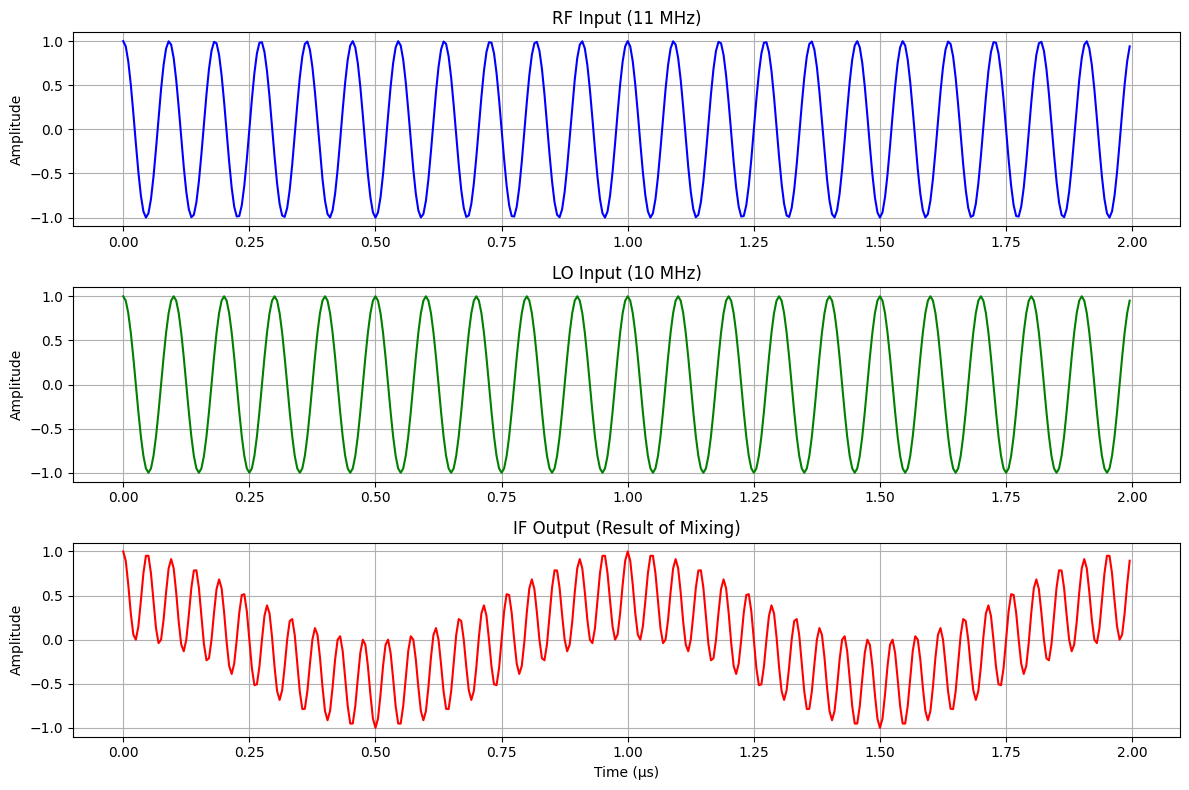

In [2]:
# @title 1. The Basics of a Single Mixer
# @markdown First, let's simulate a basic mixer. An ideal mixer is just a multiplier. We'll mix an 11 MHz RF signal with a 10 MHz Local Oscillator (LO) signal and see what happens.

import numpy as np
import matplotlib.pyplot as plt

# --- Simulation Parameters ---
fs = 200e6  # Sampling frequency (200 MHz)
t = np.arange(0, 2e-6, 1/fs) # 2 microseconds of time

# --- Signal Frequencies ---
f_rf = 11e6  # RF frequency (11 MHz)
f_lo = 10e6  # LO frequency (10 MHz)

# --- Generate Signals ---
rf_signal = np.cos(2 * np.pi * f_rf * t)
lo_signal = np.cos(2 * np.pi * f_lo * t)

# --- The Mixing Process (Multiplication) ---
if_signal = rf_signal * lo_signal

# --- Plot in the Time Domain ---
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t * 1e6, rf_signal, 'b')
plt.title('RF Input (11 MHz)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t * 1e6, lo_signal, 'g')
plt.title('LO Input (10 MHz)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t * 1e6, if_signal, 'r')
plt.title('IF Output (Result of Mixing)')
plt.xlabel('Time (µs)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

The time-domain plot of the IF output looks like a complex modulated wave. To really understand what happened, we need to look at it in the **frequency domain** using a Fast Fourier Transform (FFT).

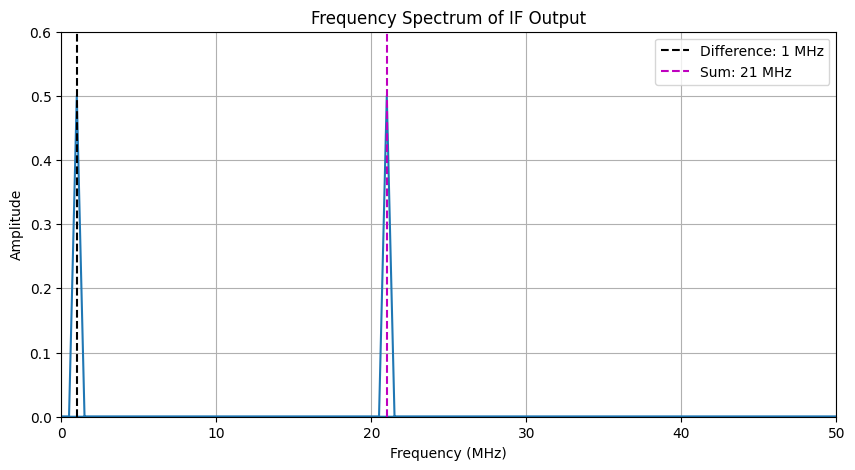

In [3]:
# @title Frequency Spectrum of the Mixed Signal
# @markdown The FFT will show us the exact frequencies present in our IF signal.

def plot_fft(signal, fs, title):
    """A simple function to plot the FFT of a signal."""
    N = len(signal)
    yf = np.fft.fft(signal)
    xf = np.fft.fftfreq(N, 1 / fs)

    plt.plot(xf / 1e6, 2.0/N * np.abs(yf))
    plt.title(title)
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.xlim(0, 50) # Limit x-axis to see our signals of interest
    plt.ylim(0, 0.6)

plt.figure(figsize=(10, 5))
plot_fft(if_signal, fs, 'Frequency Spectrum of IF Output')

# Add annotations
plt.axvline(x=(f_rf - f_lo)/1e6, color='k', linestyle='--', label=f'Difference: {int((f_rf-f_lo)/1e6)} MHz')
plt.axvline(x=(f_rf + f_lo)/1e6, color='m', linestyle='--', label=f'Sum: {int((f_rf+f_lo)/1e6)} MHz')
plt.legend()
plt.show()

As predicted by trigonometry, the output contains two main components:
* A **difference** frequency at $f_{RF} - f_{LO} = 11 - 10 = 1$ MHz.
* A **sum** frequency at $f_{RF} + f_{LO} = 11 + 10 = 21$ MHz.

In a real radio, you would use a filter to select only the frequency you want (e.g., the 1 MHz signal).

---

## 2. The Image Frequency Problem 🖼️

Now, let's demonstrate the image problem. Our desired signal is at 11 MHz, but what if there's an unwanted signal at the **image frequency** of 9 MHz?

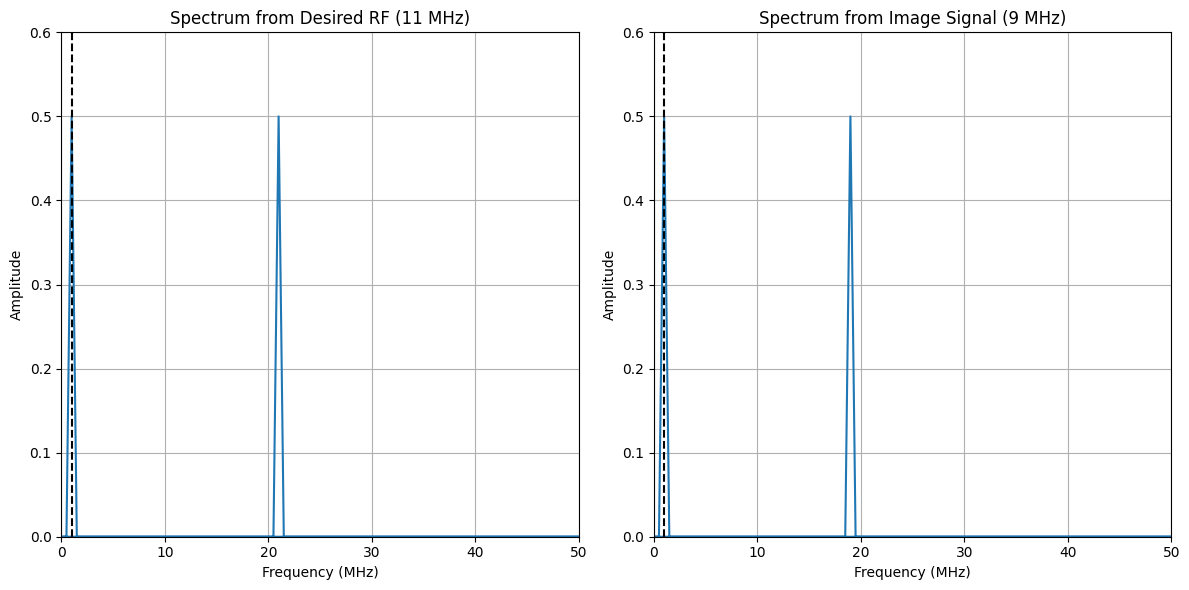

In [4]:
# @title Simulating the Image Signal
# @markdown We create the unwanted image signal and mix it with the same 10 MHz LO.

# --- Define Image Frequency ---
f_image = 9e6 # Image frequency (9 MHz)

# --- Generate Image Signal ---
image_signal = np.cos(2 * np.pi * f_image * t)

# --- Mix the image signal with the LO ---
if_from_image = image_signal * lo_signal

# --- Compare the FFTs ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_fft(if_signal, fs, 'Spectrum from Desired RF (11 MHz)')
plt.axvline(x=(f_rf - f_lo)/1e6, color='k', linestyle='--')


plt.subplot(1, 2, 2)
plot_fft(if_from_image, fs, 'Spectrum from Image Signal (9 MHz)')
plt.axvline(x=(f_lo - f_image)/1e6, color='k', linestyle='--')

plt.tight_layout()
plt.show()

**This is the problem!** Both the desired 11 MHz signal and the unwanted 9 MHz image signal produce an output at exactly 1 MHz. The simple mixer cannot tell them apart.

---

## 3. IQ Mixing: The Solution

To solve this, we use two mixers. We split the LO into an **In-phase** component (cosine) and a **Quadrature** component (sine), which is 90° out of phase.

Let's see how the desired signal and the image signal behave when passed through this IQ mixer.

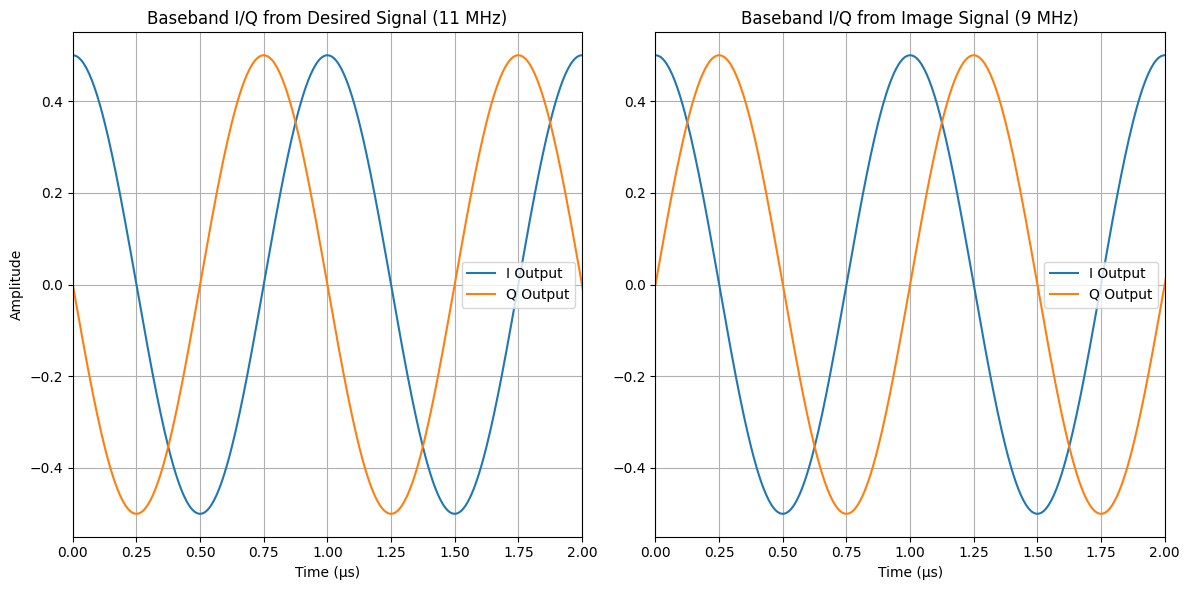

In [5]:
# @title Visualizing the I and Q Baseband Signals
# @markdown We mix both the desired signal (11 MHz) and the image signal (9 MHz)
# @markdown with our I and Q local oscillators.

# --- Generate I and Q Local Oscillators ---
lo_i = np.cos(2 * np.pi * f_lo * t)  # In-phase LO
lo_q = np.sin(2 * np.pi * f_lo * t)  # Quadrature LO

# --- IQ Mix the Desired Signal (11 MHz) ---
i_out_desired = rf_signal * lo_i
q_out_desired = rf_signal * lo_q

# --- IQ Mix the Image Signal (9 MHz) ---
i_out_image = image_signal * lo_i
q_out_image = image_signal * lo_q

# In a real radio, low-pass filters would remove the high-frequency sum component.
# We can simulate this by looking at the resulting low-frequency sine/cosine waves.
f_if = 1e6 # 1 MHz IF
t_if = np.arange(0, 3e-6, 1/fs) # Time vector for plotting IF

# The trig identities tell us the low-pass filtered result will be:
baseband_i_desired = 0.5 * np.cos(2 * np.pi * f_if * t_if)
baseband_q_desired = -0.5 * np.sin(2 * np.pi * f_if * t_if) # Note the negative sign!

baseband_i_image = 0.5 * np.cos(2 * np.pi * f_if * t_if)
baseband_q_image = 0.5 * np.sin(2 * np.pi * f_if * t_if) # Note the positive sign!

# --- Plot the phase relationship ---
plt.figure(figsize=(12, 6))

# Plot for Desired Signal
plt.subplot(1, 2, 1)
plt.plot(t_if*1e6, baseband_i_desired, label='I Output')
plt.plot(t_if*1e6, baseband_q_desired, label='Q Output')
plt.title('Baseband I/Q from Desired Signal (11 MHz)')
plt.xlabel('Time (µs)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.xlim(0, 2)

# Plot for Image Signal
plt.subplot(1, 2, 2)
plt.plot(t_if*1e6, baseband_i_image, label='I Output')
plt.plot(t_if*1e6, baseband_q_image, label='Q Output')
plt.title('Baseband I/Q from Image Signal (9 MHz)')
plt.xlabel('Time (µs)')
plt.grid(True)
plt.legend()
plt.xlim(0, 2)

plt.tight_layout()
plt.show()

Look closely at the plots above.

* For the **Desired Signal (11 MHz)**, the Q signal **lags** the I signal by 90°. When I is at its peak, Q is at zero and heading negative.
* For the **Image Signal (9 MHz)**, the Q signal **leads** the I signal by 90°. When I is at its peak, Q is at zero and heading positive.

This difference in phase relationship is the key! A circuit or algorithm can detect this difference to reject the image and keep the desired signal.

A powerful way to see this relationship is to plot I vs. Q on a parametric plot (a Lissajous plot).

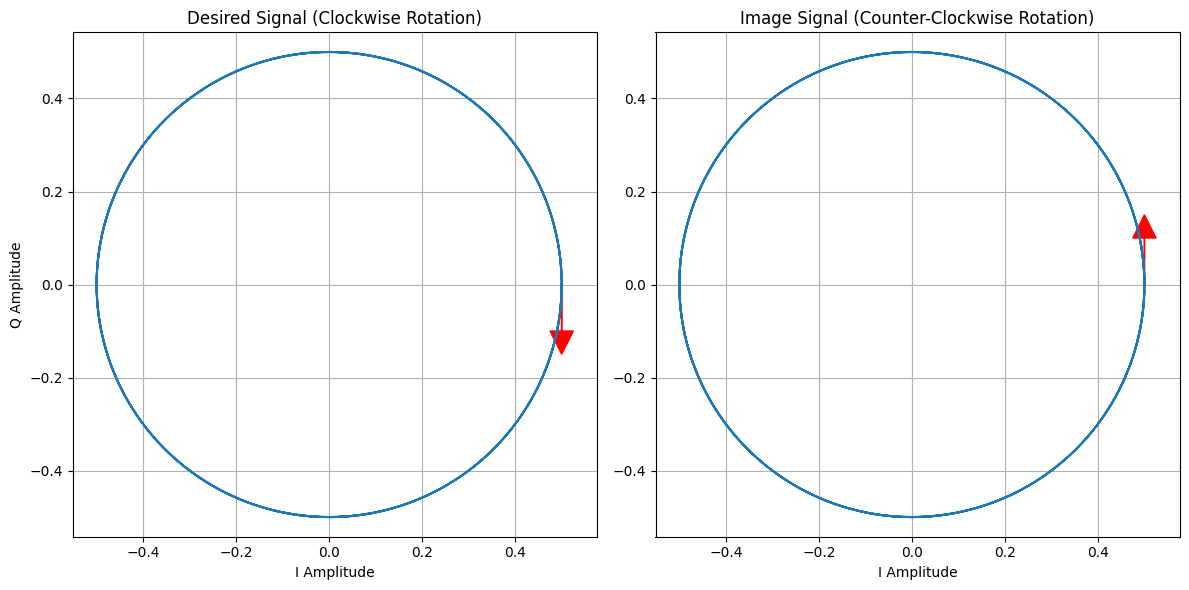

In [6]:
# @title I vs. Q Parametric Plot
# @markdown This plot shows the "rotational" direction of the signal vector.

plt.figure(figsize=(12, 6))

# Plot for Desired Signal
plt.subplot(1, 2, 1)
plt.plot(baseband_i_desired, baseband_q_desired)
plt.title('Desired Signal (Clockwise Rotation)')
plt.xlabel('I Amplitude')
plt.ylabel('Q Amplitude')
plt.grid(True)
plt.axis('equal')
# Add an arrow to show direction
plt.arrow(0.5, 0, 0, -0.1, head_width=0.05, head_length=0.05, fc='r', ec='r')


# Plot for Image Signal
plt.subplot(1, 2, 2)
plt.plot(baseband_i_image, baseband_q_image)
plt.title('Image Signal (Counter-Clockwise Rotation)')
plt.xlabel('I Amplitude')
plt.grid(True)
plt.axis('equal')
# Add an arrow to show direction
plt.arrow(0.5, 0, 0, 0.1, head_width=0.05, head_length=0.05, fc='r', ec='r')


plt.tight_layout()
plt.show()

## Conclusion ✅

As you can see, IQ mixing provides us with extra information about the signal—its phase.

* A simple mixer only gives us the magnitude of the signal at the IF.
* An IQ mixer gives us two outputs (I and Q) that encode the phase relationship.

The desired signal and its image cause the IQ vector to rotate in **opposite directions**. This allows an **image-reject mixer** to phase shift one of the components (e.g., Q by 90°) and add it to the other (I). For one rotational direction they will add constructively, and for the other, they will add destructively, canceling the image out.